In [180]:
print("hello world")

hello world


In [181]:
for i in range(10):
  print(i*2)

0
2
4
6
8
10
12
14
16
18


In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

In [183]:
df =pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/DATA/fake_reg.csv")

In [184]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [185]:
len(df)

1000

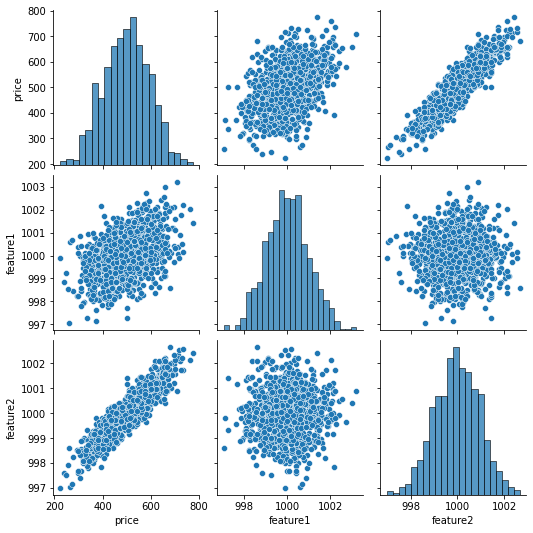

In [186]:
sns.pairplot(df)

In [187]:
from sklearn.model_selection import train_test_split


In [188]:
X= df[["feature1","feature2"]].values

In [189]:
y=df["price"].values

In [190]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:
len(X_train),len(X_test),len(y_train),len(y_test)

(700, 300, 700, 300)

In [193]:
X_train.shape

(700, 2)

In [194]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
scaler =MinMaxScaler()


In [196]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [197]:
X_train=scaler.transform(X_train)

In [198]:
X_test=scaler.transform(X_test)

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [200]:
# model =Sequential([
#                    Dense(4,activation="relu"),
#                    Dense(2,activation="relu"),
#                    Dense(1)
# ])




In [201]:
model =Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",
              loss="mse")

In [202]:
model.fit(X_train,
          y_train,
          epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256713.8125
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256689.4844
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256667.4062
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256645.5312
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256623.5938
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256601.6250
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256579.7969
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256557.9688
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256536.0938
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256514.1719
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 256492.2344
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [203]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


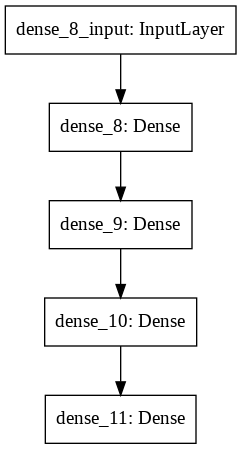

In [204]:
import tensorflow as tf

#plot the loss curve
tf.keras.utils.plot_model(model)

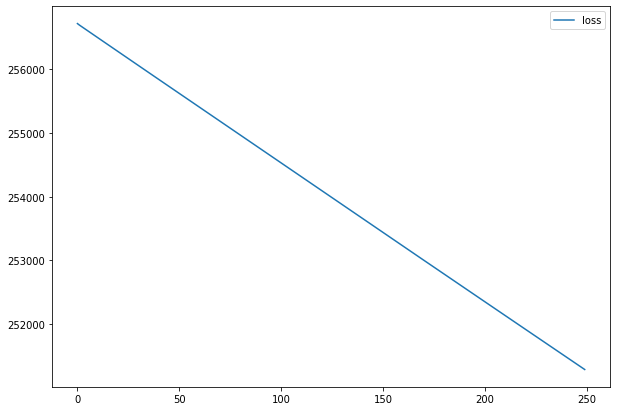

In [205]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(10,7))

In [206]:
original_results=model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 253687.8438


In [207]:
test_predictions=model.predict(X_test)
test_predictions[:5]

array([[5.505849],
       [5.505849],
       [5.505849],
       [5.505849],
       [5.505849]], dtype=float32)

In [208]:
test_predictions=pd.Series(test_predictions.reshape(300,))
test_predictions

0      5.505849
1      5.505849
2      5.505849
3      5.505849
4      5.505849
         ...   
295    5.505849
296    5.505849
297    5.505849
298    5.505849
299    5.505849
Length: 300, dtype: float32

In [209]:
pred_df=pd.DataFrame(y_test,columns=["Test True Y"])
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [210]:
pred_df.columns=["Test True Y","Model Predictions"]
pred_df

,Test True Y,Model Predictions
0,402.296319,5.505849
1,624.156198,5.505849
2,582.455066,5.505849
3,578.588606,5.505849
4,371.224104,5.505849
...,...,...
295,525.704657,5.505849
296,502.909473,5.505849
297,612.727910,5.505849
298,417.569725,5.505849


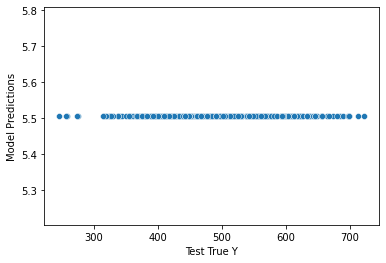

In [211]:
sns.scatterplot(x="Test True Y",y="Model Predictions",data=pred_df)

In [212]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [213]:
mean_absolute_error(pred_df["Test True Y"],pred_df["Model Predictions"])

494.86949059050056

In [214]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [215]:
mean_squared_error(pred_df["Test True Y"],pred_df["Model Predictions"])

253687.84438271428

In [216]:
squre_root_error=tf.sqrt(mean_squared_error(pred_df["Test True Y"],pred_df["Model Predictions"])).numpy()
squre_root_error

503.674343581956

In [217]:
from tensorflow.keras.models import load_model
model.save("my_gem_model.h5")

In [218]:
load_model=load_model("/content/my_gem_model.h5")

In [219]:
load_model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 253687.8438


253687.84375

In [220]:
original_results

253687.84375

In [221]:
import matplotlib.pyplot as plt


In [222]:
df=pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/DATA/kc_house_data.csv")

In [223]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [224]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 720x504 with 0 Axes>

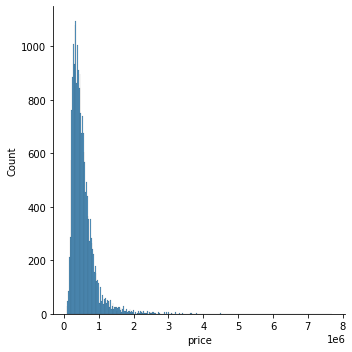

In [225]:
plt.figure(figsize=(10,7))
sns.displot(df["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


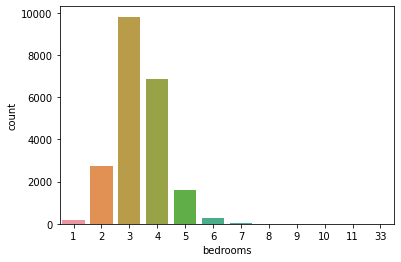

In [226]:
sns.countplot(df["bedrooms"])


In [227]:
df.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

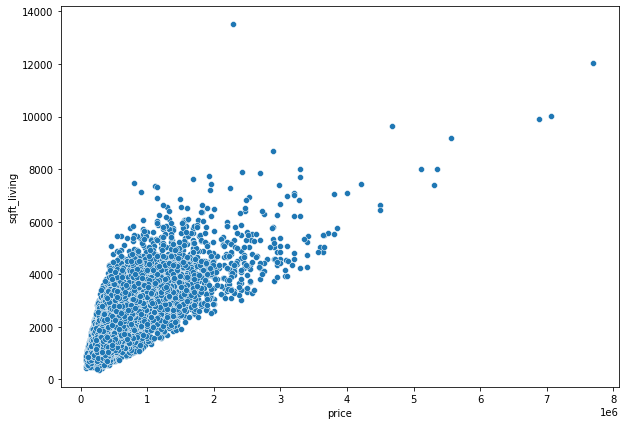

In [228]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="sqft_living",data=df)

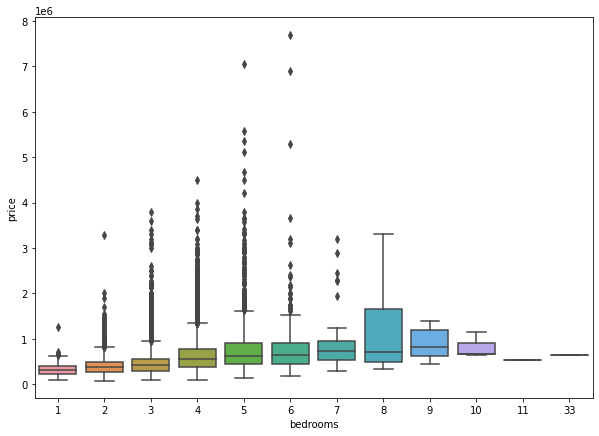

In [229]:
plt.figure(figsize=(10,7))

sns.boxplot(x="bedrooms",y="price",data=df)

In [230]:
pip install https://github.com/matplotlib/basemap/archive/master.zip


  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [231]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


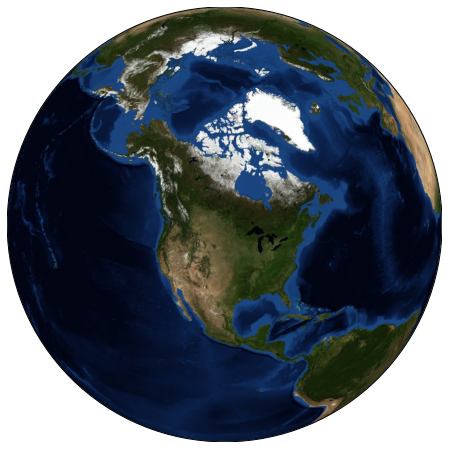

In [232]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [233]:
pip install geopandas

In [234]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [235]:
df["long"]

0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21592   -122.346
21593   -122.362
21594   -122.299
21595   -122.069
21596   -122.299
Name: long, Length: 21597, dtype: float64

In [236]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df["lat"],df["long"] ))

In [237]:
print(gdf.head())

           id        date  ...  sqft_lot15                 geometry
0  7129300520  10/13/2014  ...        5650  POINT (47.511 -122.257)
1  6414100192   12/9/2014  ...        7639  POINT (47.721 -122.319)
2  5631500400   2/25/2015  ...        8062  POINT (47.738 -122.233)
3  2487200875   12/9/2014  ...        5000  POINT (47.521 -122.393)
4  1954400510   2/18/2015  ...        7503  POINT (47.617 -122.045)

[5 rows x 22 columns]


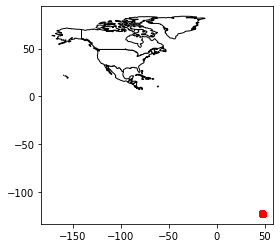

In [238]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent=='North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

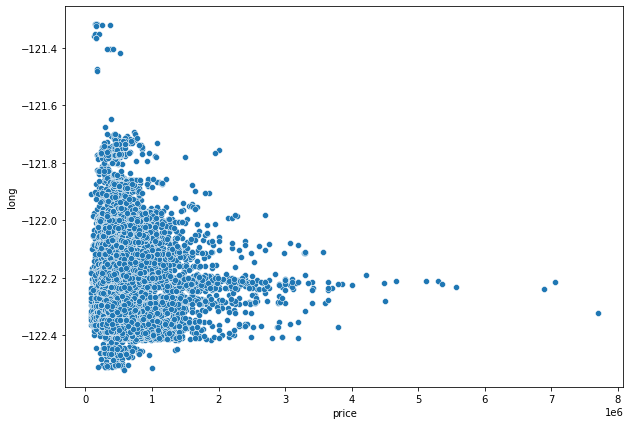

In [239]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="long",data=df)

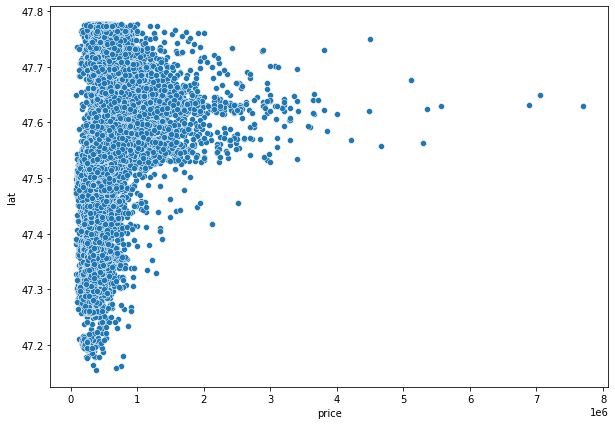

In [240]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="lat",data=df)

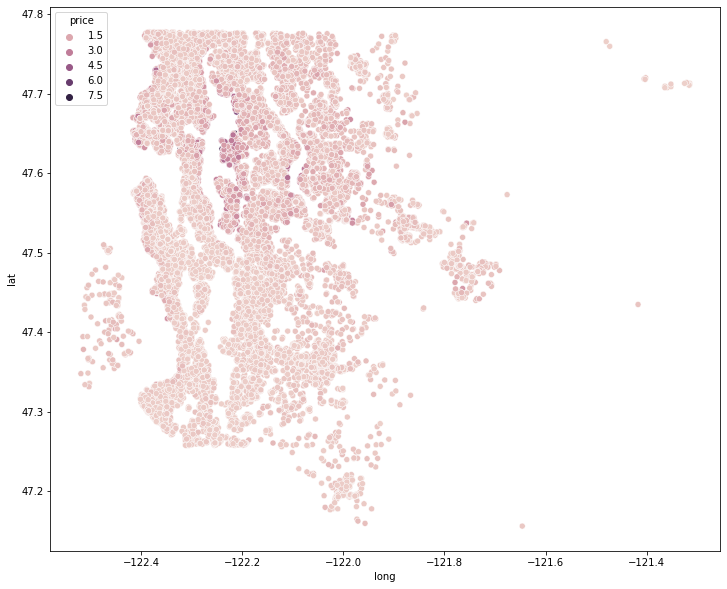

In [241]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="long",y="lat",data=df,hue="price")

In [242]:
df.sort_values("price",ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,POINT (47.630 -122.323)
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,POINT (47.650 -122.214)
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,POINT (47.630 -122.240)
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,POINT (47.629 -122.233)
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,POINT (47.623 -122.220)
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,POINT (47.563 -122.210)
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,POINT (47.677 -122.211)
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,POINT (47.557 -122.210)
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,POINT (47.749 -122.280)
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,POINT (47.621 -122.219)


In [243]:
len(df)

21597

In [244]:
non_top1_precent=df.sort_values("price",ascending=False).iloc[216:]

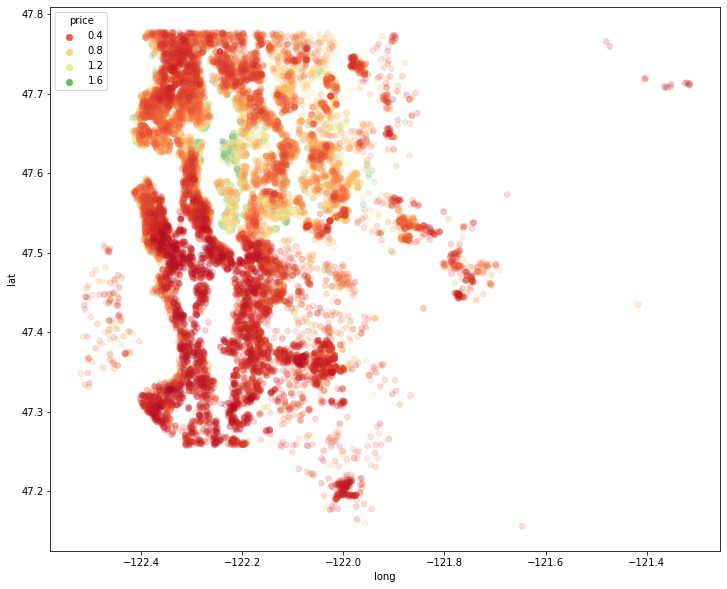

In [245]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="long",y="lat",data=non_top1_precent,
                hue="price",
                edgecolor=None,
                alpha=0.2,
                palette="RdYlGn")

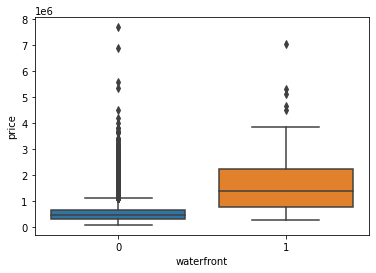

In [246]:
sns.boxplot(x="waterfront",y="price",data=df)

In [247]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,POINT (47.511 -122.257)
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,POINT (47.721 -122.319)
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,POINT (47.738 -122.233)
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,POINT (47.521 -122.393)
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,POINT (47.617 -122.045)


In [248]:
df=df.drop("id",axis=1)

In [249]:
df["date"] =pd.to_datetime(df["date"])

In [250]:
df["year"] =df["date"].apply(lambda date :date.year)
df["month"] =df["date"].apply(lambda date :date.month)

In [251]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,POINT (47.511 -122.257),2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,POINT (47.721 -122.319),2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,POINT (47.738 -122.233),2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,POINT (47.521 -122.393),2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,POINT (47.617 -122.045),2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,POINT (47.699 -122.346),2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,POINT (47.511 -122.362),2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,POINT (47.594 -122.299),2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,POINT (47.535 -122.069),2015,1


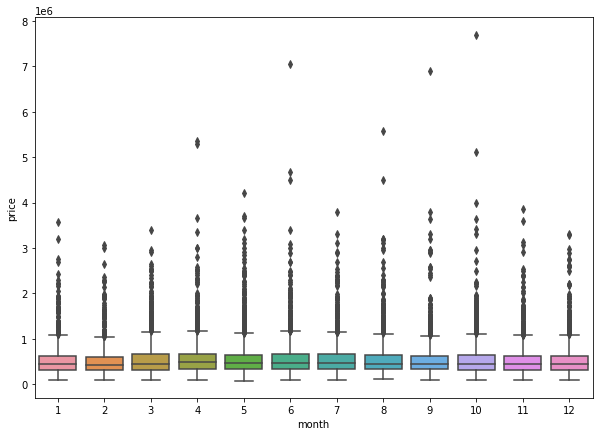

In [252]:
plt.figure(figsize=(10,7))
sns.boxplot(x="month",y="price",data=df)

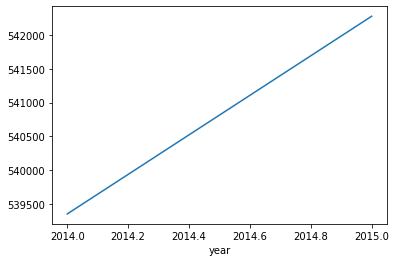

In [253]:
df.groupby("year").mean()["price"].plot()

In [254]:
df=df.drop("date",axis=1)

In [255]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'geometry', 'year', 'month'],
      dtype='object')

In [256]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,POINT (47.511 -122.257),2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,POINT (47.721 -122.319),2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,POINT (47.738 -122.233),2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,POINT (47.521 -122.393),2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,POINT (47.617 -122.045),2015,2


In [257]:
df["zipcode"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [258]:
df=df.drop("zipcode",axis=1)
df=df.drop("geometry",axis=1)

In [259]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [260]:
df["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [261]:
X =df.drop("price",axis=1).values
y =df["price"].values

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [263]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model =Sequential()
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss="mse")



In [267]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400,
          verbose=0)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430227259392.0000 - val_loss: 418833498112.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 427822809088.0000 - val_loss: 410323451904.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 393605152768.0000 - val_loss: 333384253440.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 251187134464.0000 - val_loss: 146360025088.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 112847708160.0000 - val_loss: 95587336192.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 97787002880.0000 - val_loss: 93766795264.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 95786975232.0000 - val_loss: 91781808128.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 93728145408.0000 - val_loss: 89899098112.0000
Epoch 9/400
119/119 [==

In [271]:
losses=pd.DataFrame(model.history.history)

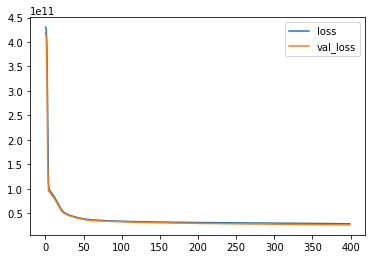

In [272]:
losses.plot()

In [277]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [278]:
predictions=model.predict(X_test)

In [280]:
np.sqrt(mean_squared_error(y_test,predictions))

161126.82950250307

In [281]:
mean_absolute_error(y_test,predictions)

99850.15319613233

In [283]:
explained_variance_score(y_test,predictions)

0.8043152026287772

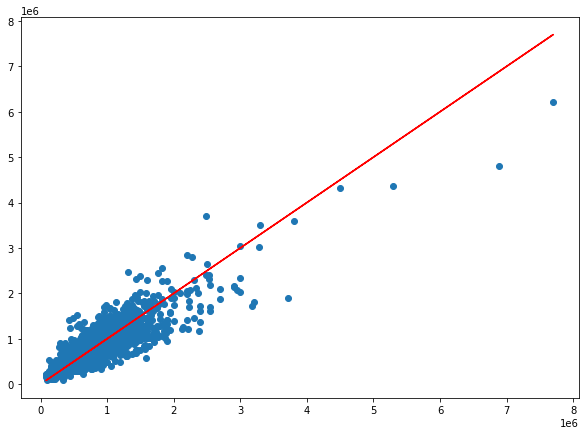

In [285]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,"r")

In [291]:
single_house=df.drop("price",axis=1).iloc[0]

In [292]:
single_house=scaler.transform(single_house.values.reshape(-1,19))
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [293]:
model.predict(single_house)

array([[282788.]], dtype=float32)

In [294]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


#TensorFlow -Classification

In [295]:
df=pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/DATA/cancer_classification.csv")

In [297]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [299]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


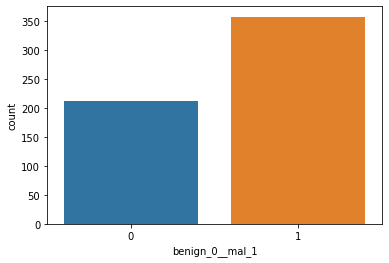

In [302]:
sns.countplot(x='benign_0__mal_1',data=df)

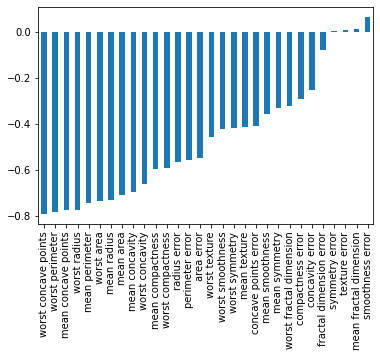

In [305]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

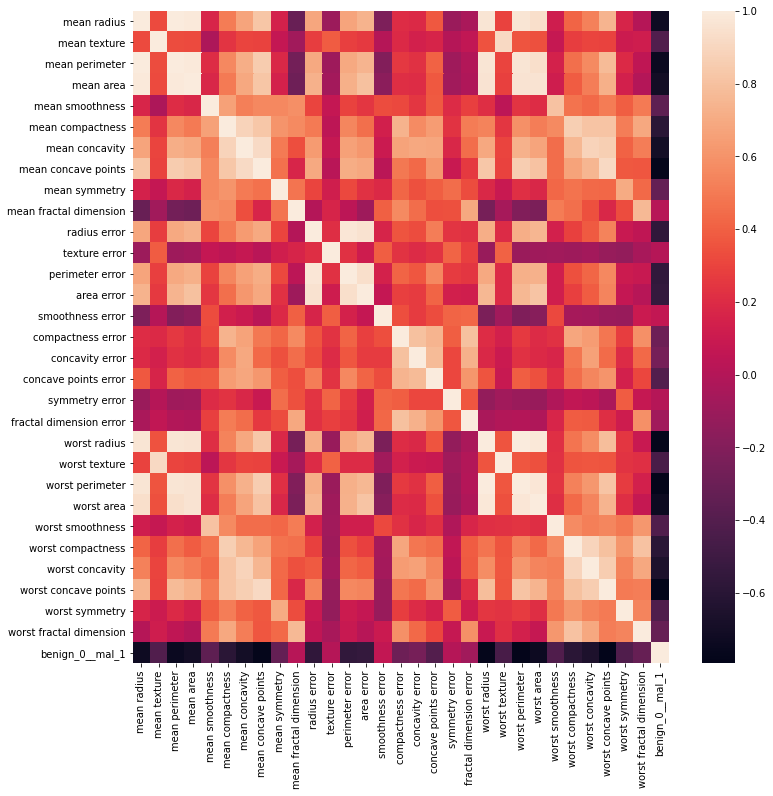

In [306]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [307]:
X=df.drop("benign_0__mal_1",axis=1).values
y=df["benign_0__mal_1"].values

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [310]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [316]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(15,activation="relu"))

#binary classification
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam")

model.fit(X_train,
          y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          verbose=0)

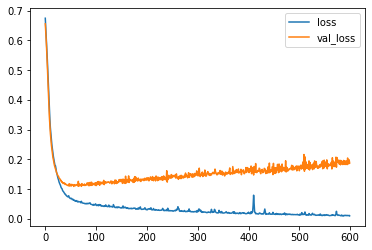

In [317]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [327]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(15,activation="relu"))

#binary classification
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam")



In [328]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop =EarlyStopping(monitor="val_loss",
                          mode="min",
                          patience=25)

In [329]:
model.fit(X_train,
          y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6582 - val_loss: 0.6414
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6276 - val_loss: 0.6102
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5943 - val_loss: 0.5740
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5539 - val_loss: 0.5280
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5044 - val_loss: 0.4742
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4520 - val_loss: 0.4161
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3961 - val_loss: 0.3624
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3504 - val_loss: 0.3186
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3130 - val_loss: 0.2837
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2822 - val_loss: 0.2584
Epoch 11

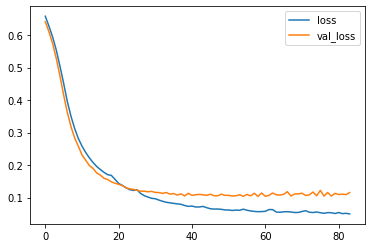

In [330]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [334]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15,activation="relu"))
model.add(Dropout(0.5))

#binary classification
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam")

In [335]:
model.fit(X_train,
          y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7370 - val_loss: 0.6940
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7043 - val_loss: 0.6832
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6894 - val_loss: 0.6737
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6817 - val_loss: 0.6630
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6722 - val_loss: 0.6508
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6355 - val_loss: 0.6349
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6107
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6173 - val_loss: 0.5856
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5905 - val_loss: 0.5614
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5655 - val_loss: 0.5347
Epoch 11

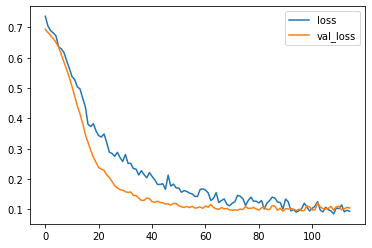

In [336]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [346]:
predictions=model.predict(X_test)
predictions=predictions.round().tolist()
predictions[:20]




[[1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0]]

In [350]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.98      0.97      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [351]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 3 85]]
